In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
df = pd.read_excel("Fault dataset.xlsx")
df.head()

,Fault Current,Type of Fault
0,2.72,0
1,3.52,0
2,1.34,0
3,5.67,0
4,7.29,1


In [7]:
X = df[["Fault Current"]] 
y = df["Type of Fault"] 
# Split the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

# Define and train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [8]:
for i in range(len(X_test)):  
 print("Test data:", X_test.iloc[i], "| True label:", y_test.iloc[i], "|") 
if y_test.iloc[i] == y_pred[i]:  
 print("Correct prediction")  
else: print("Wrong prediction")

Test data: Fault Current    4.23
Name: 9, dtype: float64 | True label: 0 |
Test data: Fault Current    0.32
Name: 11, dtype: float64 | True label: 1 |
Test data: Fault Current    2.72
Name: 0, dtype: float64 | True label: 0 |
Correct prediction


In [16]:
H = float(input("Fault Current: ")) 
predicted_label = knn.predict([[H]]) 
print("Predicted label:", predicted_label[0])

Fault Current:  7.3


Predicted label: 1


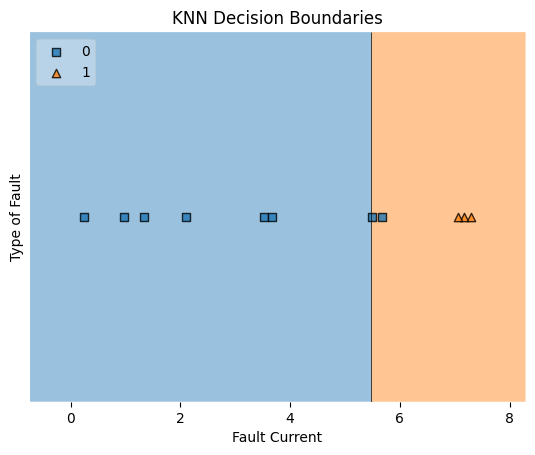

In [13]:
knn.fit(X_train, y_train) 
plot_decision_regions(X_train.values, y_train.values, clf=knn, legend=2) 
plt.xlabel('Fault Current')
plt.ylabel('Type of Fault') 
plt.title('KNN Decision Boundaries') 
plt.show()